# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [ ]:
# mouse_metadata.head()
mouse_metadata.info()

In [ ]:
# study_results.head()
study_results.info()

In [ ]:
# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
# df.head()
# df.info()

In [ ]:
# Checking the number of mice.
mice_count = df["Mouse ID"].nunique()
print(mice_count)


In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
df.set_index(['Mouse ID', 'Timepoint'])


In [ ]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. **Ask the Expert
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_mice)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989"] 

In [ ]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = clean_df["Mouse ID"].nunique()
updated_mice_count

In [55]:
# clean_df.head(25)
# clean_df.info

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
summ = data.agg(["mean", "median", "var", "std", "sem"])
summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Ask the expert
summ = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = clean_df.groupby("Drug Regimen").size()

In [65]:
# drug_data.head()

In [67]:
# Sort Descending
sorted_drug_data = drug_data.sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

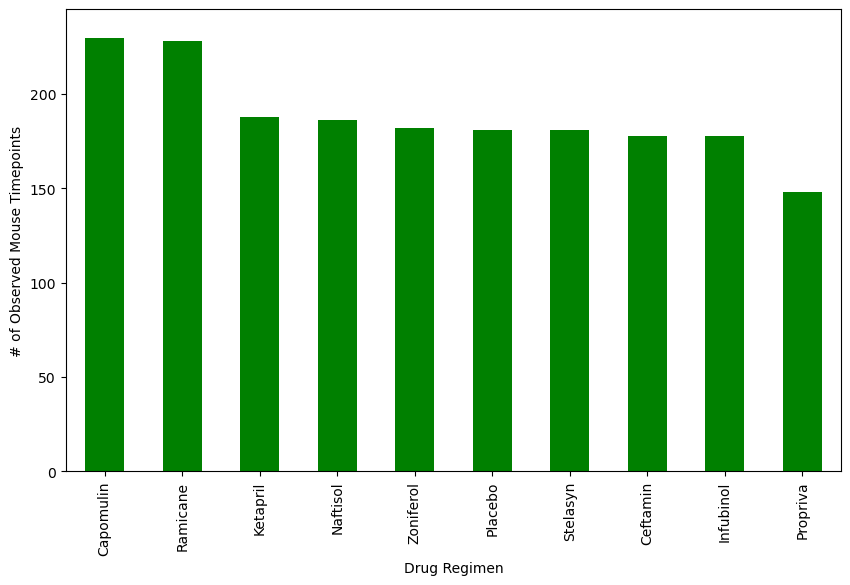

In [68]:
sorted_drug_data.plot(kind="bar", x="Mouse ID", y="Timepoint", color="green", figsize=(10,6), xlim=(-1, 300), ylim=(0, 245),xlabel=("Drug Regimen"),
ylabel=("# of Observed Mouse Timepoints"))
plt.show

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x:

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
